# Linear regression with `scikit-learn`

In this notebook, we'll introduce the Python package [`scikit-learn`](https://scikit-learn.org/stable/index.html) by using it to solve the same regression problems we explored "by hand" earlier. `scikit-learn` is a versatile Python package for machine learning that implements a large number of machine learning methods (and related stuff).  It's modular interface and design make for rapid implementation and experimentation.  Plus, the documentation for `scikit-learn` is outstanding.

We'll start once again by loading the fuel efficiency dataset.

In [1]:
import pandas as pd

#df = pd.read_csv('data/auto_mpg.csv')
df = pd.read_csv('/blue/zoo4926/share/Jupyter_Content/data/auto_mpg.csv')

In [2]:
df

,mpg,cyl,disp,hp,weight,accel,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Let's use scikit-learn to fit a linear regression model to these data.  The [assigned reading from PDSH](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html) explains the design and user interface of scikit-learn in much more detail than I'll cover in this notebook; it is definitely worth reading to get a more complete view and a slightly different perspective (you only need to read up to the "Simple linear regression" section).

## Basic linear regression

### 1. Extract the data for training the model

The input ($x$) data need to be arranged as a matrix with each variable in its own column.  The response ($y$) should be a simple vector.

In [3]:
x = df[['hp']]
y = df.mpg

In [4]:
x

,hp
0,130
1,165
2,150
3,150
4,140
...,...
387,86
388,52
389,84
390,79


### 2. Create and fit the regression model

In scikit-learn, we first create an instance of whatever model we are using, then call the model's `fit()` method with our $x$ and $y$ data.  In this case, we want to create an instance of [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Note that you can also instantiate the model and call `fit()` with a single line of code.

In [6]:
model = LinearRegression().fit(x, y)

### 3. Inspect the results

The estimated regression coefficients are returned in the `intercept_` and `coef_` attributes of the model object.

In [7]:
print(model.intercept_, model.coef_)

39.93586102117047 [-0.15784473]


Let's graph it, too.

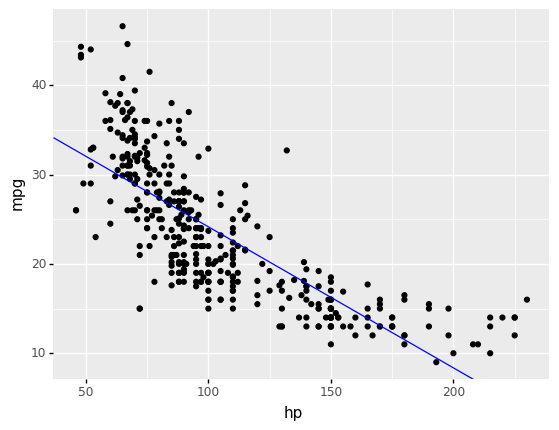

<ggplot: (2999054985220)>

In [8]:
import plotnine as pn

pn.ggplot(df, pn.aes(x='hp', y='mpg')) + pn.geom_point() + pn.geom_abline(intercept=model.intercept_, slope=model.coef_[0], color='blue')

If you have a background in statistics, you are undoubtedly familiar with using $R^2$, the "coefficient of determination", to evaluate linear models.  We can get $R^2$ from our model object by calling the `score()` method with the data we used to train the model.

In [9]:
model.score(x, y)

0.6059482578894348

## Multiple linear regression

Let's duplicate the quadratic function fit that we implemented a few days ago by minimizing the loss function using numerical optimization techniques.  As a reminder, we want to fit this model:

$$ \hat{mpg} = a + b \cdot hp + c \cdot hp^2 $$

Because each input variable needs to be a separate column in the input ($x$) matrix, we'll need to add a column for $hp^2$.

In [14]:
df['hp_sq'] = df.hp**2

x2 = df[['hp', 'hp_sq']]
x2

,hp,hp_sq
0,130,16900
1,165,27225
2,150,22500
3,150,22500
4,140,19600
...,...,...
387,86,7396
388,52,2704
389,84,7056
390,79,6241


In [16]:
model = LinearRegression().fit(x2, y)
print(model.intercept_, model.coef_)

56.900099702112925 [-0.46618963  0.00123054]


In [17]:
model.score(x2, y)

0.6875590305127517

To graph this model, we can take advantage of the model object's `predict()` method to generate paired $(x, y)$ values that trace the regression line. We'll need to create a new dataframe with columns that match the columns in our training data. To easily use this method with `plotnine`, be sure the number of paired $(x, y)$ values in the new dataframe matches the number of training data observations.

In [35]:
import numpy as np
import pandas as pd

# SOLUTION 1: Make sure our new data arrays are the same length as the training data.

xvals = np.linspace(x2.hp.min(), x2.hp.max(), len(df))
x_predict = pd.DataFrame({
    'hp': xvals,
    'hp_sq': xvals**2
})

y = model.predict(x_predict)

(pn.ggplot(df, pn.aes(x='hp', y='mpg')) + pn.geom_point() +
     pn.geom_line(mapping=pn.aes(x=xvals, y=y), color='blue', size=1.0)
)


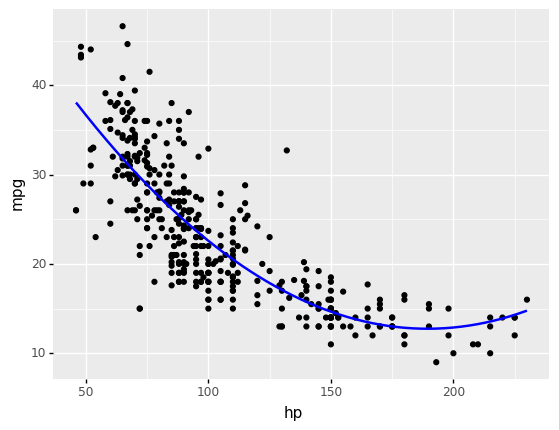

<ggplot: (2999216492469)>

In [36]:
# SOLUTION 2: Give an entirely new dataframe to geom_line().

xvals = np.linspace(x2.hp.min(), x2.hp.max(), len(df))
xy_predict = pd.DataFrame({
    'hp': xvals,
    'hp_sq': xvals**2
})

xy_predict['y'] = model.predict(xy_predict)

(pn.ggplot(df, pn.aes(x='hp', y='mpg')) + pn.geom_point() +
     pn.geom_line(data=xy_predict, mapping=pn.aes(x='hp', y='y'), color='blue', size=1.0)
)

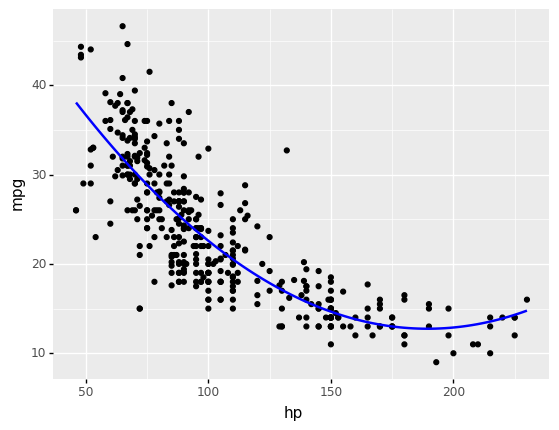

<ggplot: (2999001953901)>

In [33]:
(pn.ggplot(df, pn.aes(x='hp', y='mpg')) + pn.geom_point() +
     pn.geom_line(data=xy_predict, mapping=pn.aes(x='hp', y='y'), color='blue', size=1.0)
)

It does require a bit of work to graph the model, so if it is something you need to do often, you might as well write a function that takes care of the details!

Let's take a look at $R^2$ to get a better idea of how well our new model fits.

We did achieve a modest increase in $R^2$, which suggests the more complicated model fits the data better.  This result corroborates our earlier comparison of $MSE$ values for these two models.

## Excercise:

Using the tools you've learned so far for data exploration and model fitting, can you find a better linear regression model for predicting an automobile's fuel efficiency ($mpg$) from its other attributes?  For this exercise, you can evaluate the fit of your models using $R^2$.

## Final thoughts

The `scikit-learn` workflow outlined above (get data, create model object, fit model, inspect results) is basically the same across all of scikit-learn's many machine learning methods.  That consistency and ease of use is certainly one of the reasons `scikit-learn` is so popular.

I should also note that the method we implemented above for polynomial regression, where we manually created the $hp^2$ column for our input dataframe, becomes rather cumbersome when we're dealing with large numbers of variables and we want to explore transformations of multiple variables or interactions.  As you might expect, `scikit-learn` implements tools to make this easier.  We won't cover the techniques right now, but the idea is to use data "transformer" objects to automatically create the extra dataframe columns.  You can [read more about that here](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions).